**Training_MNIST**



In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import numpy as np
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoaders
train_loader_full_batch = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)  # For GD
train_loader_mini_batch = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)  # For Mini-Batch GD
train_loader_stochastic = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)  # For True SGD
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()

# Function to test the model
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

# Main function to compare optimizers
def compare_optimizers(optimizers):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    results = {}

    for opt_name, (opt_func, train_loader) in optimizers.items():
        model = Net().to(device)
        optimizer = opt_func(model.parameters())
        start_time = time.time()

        for epoch in range(1, 11):  # Train for 10 epochs
            train(model, device, train_loader, optimizer, epoch)
            test_loss, accuracy = test(model, device, test_loader)

        end_time = time.time()
        results[opt_name] = {
            'Convergence Time': end_time - start_time,
            'Final Accuracy': accuracy
        }

    return results

optimizers = {
    'Gradient_Descent': (lambda params: optim.SGD(params, lr=0.4), train_loader_full_batch),
    'Mini_Batch_GD': (lambda params: optim.SGD(params, lr=0.01), train_loader_mini_batch),
    'True_SGD': (lambda params: optim.SGD(params, lr=0.01), train_loader_stochastic),
    'SGD_Momentum': (lambda params: optim.SGD(params, lr=0.01, momentum=0.9), train_loader_mini_batch),
    'Adam': (lambda params: optim.Adam(params, lr=0.001), train_loader_mini_batch)
}

# Compare the optimizers
results = compare_optimizers(optimizers)
print(results)


100%|██████████| 9912422/9912422 [00:00<00:00, 68525819.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23353710.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45234721.90it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7967598.82it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



{'Gradient_Descent': {'Convergence Time': 129.71213483810425, 'Final Accuracy': 80.61}, 'Mini_Batch_GD': {'Convergence Time': 142.6851933002472, 'Final Accuracy': 93.2}, 'True_SGD': {'Convergence Time': 165.19732689857483, 'Final Accuracy': 94.84}, 'SGD_Momentum': {'Convergence Time': 146.59541201591492, 'Final Accuracy': 97.75}, 'Adam': {'Convergence Time': 178.76122093200684, 'Final Accuracy': 98.09}}


# **MNIST Average Result**

In [ ]:
result_1 = {
    'Gradient_Descent': {'Convergence Time': 123.5622169971466, 'Final Accuracy': 80.61},
    'Mini_Batch_GD': {'Convergence Time': 133.0816400051117, 'Final Accuracy': 93.2},
    'True_SGD': {'Convergence Time': 155.46212220191956, 'Final Accuracy': 94.84},
    'SGD_Momentum': {'Convergence Time': 143.63095045089722, 'Final Accuracy': 97.75},
    'Adam': {'Convergence Time': 172.3137834072113, 'Final Accuracy': 98.09}
}

result_2 = {
    'Gradient_Descent': {'Convergence Time': 139.73981738090515, 'Final Accuracy': 80.61},
    'Mini_Batch_GD': {'Convergence Time': 141.4922833442688, 'Final Accuracy': 93.2},
    'True_SGD': {'Convergence Time': 165.53429460525513, 'Final Accuracy': 94.84},
    'SGD_Momentum': {'Convergence Time': 152.52481269836426, 'Final Accuracy': 97.75},
    'Adam': {'Convergence Time': 183.86943340301514, 'Final Accuracy': 98.09}
}

result_3 = {
    'Gradient_Descent': {'Convergence Time': 120.61935949325562, 'Final Accuracy': 80.61},
    'Mini_Batch_GD': {'Convergence Time': 141.4238841533661, 'Final Accuracy': 93.2},
    'True_SGD': {'Convergence Time': 168.3271815776825, 'Final Accuracy': 94.84},
    'SGD_Momentum': {'Convergence Time': 151.8776330947876, 'Final Accuracy': 97.75},
    'Adam': {'Convergence Time': 183.69381523132324, 'Final Accuracy': 98.09}
}

# Initialize dictionary to store averages
MNIST_average_results = {}



import matplotlib.pyplot as plt
# Iterating through the keys (optimizer names)
for key in result_1:
    # Calculating average for each key
    avg_convergence_time = (result_1[key]['Convergence Time'] + result_2[key]['Convergence Time'] + result_3[key]['Convergence Time']) / 3
    avg_final_accuracy = (result_1[key]['Final Accuracy'] + result_2[key]['Final Accuracy'] + result_3[key]['Final Accuracy']) / 3
    MNIST_average_results[key] = {'Average Convergence Time': avg_convergence_time, 'Average Final Accuracy': avg_final_accuracy}

MNIST_average_results

{'Gradient_Descent': {'Average Convergence Time': 127.97379795710246,
  'Average Final Accuracy': 80.61},
 'Mini_Batch_GD': {'Average Convergence Time': 138.66593583424887,
  'Average Final Accuracy': 93.2},
 'True_SGD': {'Average Convergence Time': 163.10786612828574,
  'Average Final Accuracy': 94.83999999999999},
 'SGD_Momentum': {'Average Convergence Time': 149.34446541468301,
  'Average Final Accuracy': 97.75},
 'Adam': {'Average Convergence Time': 179.95901068051657,
  'Average Final Accuracy': 98.08999999999999}}

# **MNIST Plotting**

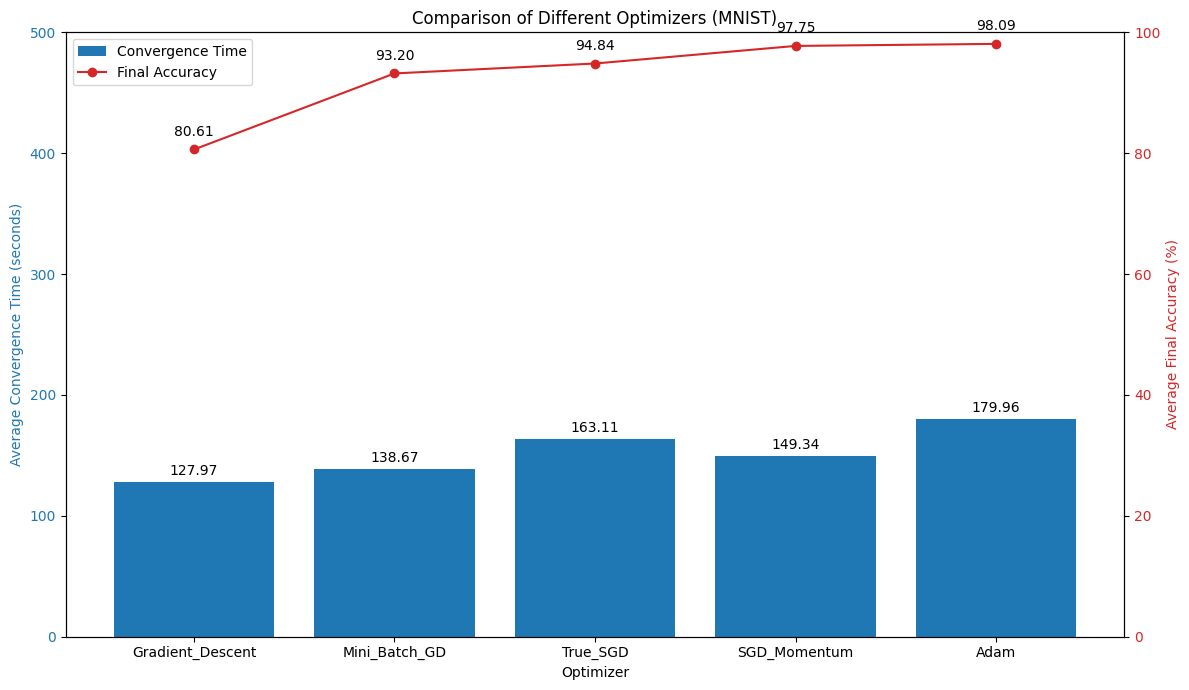

In [ ]:
import matplotlib.pyplot as plt

# Assuming MNIST_average_results is defined and contains the necessary data
optimizers = list(MNIST_average_results.keys())
convergence_times = [MNIST_average_results[opt]['Average Convergence Time'] for opt in optimizers]
final_accuracies = [MNIST_average_results[opt]['Average Final Accuracy'] for opt in optimizers]

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Convergence Time
color_convergence = 'tab:blue'
ax1.set_xlabel('Optimizer')
ax1.set_ylabel('Average Convergence Time (seconds)', color=color_convergence)
convergence_bar = ax1.bar(optimizers, convergence_times, color=color_convergence, label='Convergence Time')
ax1.tick_params(axis='y', labelcolor=color_convergence)

# Set x-axis and y-axis range for ax1 (Convergence Time)
ax1.set_ylim(0, 500)  # Assuming you want to set the y-axis for Convergence Time up to 500

# Add data labels for convergence time
for bar in convergence_bar:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color_accuracy = 'tab:red'
ax2.set_ylabel('Average Final Accuracy (%)', color=color_accuracy)
accuracy_line, = ax2.plot(optimizers, final_accuracies, color=color_accuracy, marker='o', label='Final Accuracy')
ax2.tick_params(axis='y', labelcolor=color_accuracy)

# Set y-axis range for ax2 (Final Accuracy)
ax2.set_ylim(0, 100)  # Set the y-axis for Final Accuracy from 0 to 100

# Add data labels for final accuracy
for i, txt in enumerate(final_accuracies):
    ax2.annotate(f'{txt:.2f}', (optimizers[i], final_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Title and layout
plt.title('Comparison of Different Optimizers (MNIST)')
fig.tight_layout()

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()




# **CIFAR-10 Training**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import numpy as np
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# Load CIFAR-10 dataset
transform = transforms.ToTensor()
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


train_loader_full_batch = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)  # For GD
train_loader_mini_batch = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)  # For Mini-Batch GD
train_loader_stochastic = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)  # For True SGD
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()

# Function to test the model
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:


            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

# Main function to compare optimizers
def compare_optimizers(optimizers):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    results = {}

    for opt_name, (opt_func, train_loader) in optimizers.items():
        model = Net().to(device)
        optimizer = opt_func(model.parameters())
        start_time = time.time()

        for epoch in range(1, 11):  # Train for 10 epochs
            train(model, device, train_loader, optimizer, epoch)
            test_loss, accuracy = test(model, device, test_loader)

        end_time = time.time()
        results[opt_name] = {
            'Convergence Time': end_time - start_time,
            'Final Accuracy': accuracy
        }

    return results

# Define different optimizers
optimizers = {
'Gradient_Descent_0.1':(lambda params: optim.SGD(params, lr=0.1),
                             train_loader_full_batch),
'Mini_Batch_GD':(lambda params: optim.SGD(params, lr=0.01),
                      train_loader_mini_batch),
'True_SGD':(lambda params: optim.SGD(params, lr=0.01),
                 train_loader_stochastic),
'SGD_Momentum':(lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
                     train_loader_mini_batch),
'Adam':(lambda params: optim.Adam(params, lr=0.001),
             train_loader_mini_batch)
}

# Compare the optimizers
results = compare_optimizers(optimizers)
print(results)


Files already downloaded and verified
Files already downloaded and verified
{'Gradient_Descent_0.1': {'Convergence Time': 170.63254308700562, 'Final Accuracy': 26.68}, 'Mini_Batch_GD': {'Convergence Time': 198.5527594089508, 'Final Accuracy': 45.79}, 'True_SGD': {'Convergence Time': 221.61094617843628, 'Final Accuracy': 45.42}, 'SGD_Momentum': {'Convergence Time': 218.583425283432, 'Final Accuracy': 47.6}, 'Adam': {'Convergence Time': 391.0116956233978, 'Final Accuracy': 47.52}}


# **CIFAR10 Average Result**

In [ ]:
'''
Choosing GD Learning Rate

{
'Gradient_Descent_0.1': {'Convergence Time': 193.1559660434723, 'Final Accuracy': 26.68},
'Gradient_Descent_0.01': {'Convergence Time': 222.84064078330994, 'Final Accuracy': 12.86},
'Gradient_Descent_0.001': {'Convergence Time': 211.97432041168213, 'Final Accuracy': 11.46},
'Gradient_Descent_0.2': {'Convergence Time': 172.06173419952393, 'Final Accuracy': 20.59},
'Gradient_Descent_0.3': {'Convergence Time': 185.49214553833008, 'Final Accuracy': 18.89},
'Gradient_Descent_0.03': {'Convergence Time': 181.93473720550537, 'Final Accuracy': 17.9},
'Gradient_Descent_0.02': {'Convergence Time': 178.47759866714478, 'Final Accuracy': 15.82}
}

**** GD Learning Rate = 0.1 ****
'''

result_1 = {
  'Gradient_Descent_0.1': {'Convergence Time': 171.83430314064026, 'Final Accuracy': 26.68},
  'Mini_Batch_GD': {'Convergence Time': 190.75301790237427, 'Final Accuracy': 45.79},
  'True_SGD': {'Convergence Time': 220.19393730163574, 'Final Accuracy': 45.42},
  'SGD_Momentum': {'Convergence Time': 214.90820121765137, 'Final Accuracy': 47.6},
  'Adam': {'Convergence Time': 410.5557932853699, 'Final Accuracy': 47.52}
}

result_2 = {
  'Gradient_Descent_0.1': {'Convergence Time': 174.54127097129822, 'Final Accuracy': 26.68},
  'Mini_Batch_GD': {'Convergence Time': 207.61255049705505, 'Final Accuracy': 45.79},
  'True_SGD': {'Convergence Time': 252.0337905883789, 'Final Accuracy': 45.42},
  'SGD_Momentum': {'Convergence Time': 231.49718976020813, 'Final Accuracy': 47.6},
  'Adam': {'Convergence Time': 406.45619773864746, 'Final Accuracy': 47.52}
}

result_3 = {
  'Gradient_Descent_0.1': {'Convergence Time': 170.63254308700562, 'Final Accuracy': 26.68},
  'Mini_Batch_GD': {'Convergence Time': 198.5527594089508, 'Final Accuracy': 45.79},
  'True_SGD': {'Convergence Time': 221.61094617843628, 'Final Accuracy': 45.42},
  'SGD_Momentum': {'Convergence Time': 218.583425283432, 'Final Accuracy': 47.6},
  'Adam': {'Convergence Time': 391.0116956233978, 'Final Accuracy': 47.52}
}

# Initialize dictionary to store averages
CIFAR10_average_results = {}

import matplotlib.pyplot as plt
# Iterating through the keys (optimizer names)
for key in result_1:
    # Calculating average for each key
    avg_convergence_time = (result_1[key]['Convergence Time'] + result_2[key]['Convergence Time'] + result_3[key]['Convergence Time']) / 3
    avg_final_accuracy = (result_1[key]['Final Accuracy'] + result_2[key]['Final Accuracy'] + result_3[key]['Final Accuracy']) / 3
    CIFAR10_average_results[key] = {'Average Convergence Time': avg_convergence_time, 'Average Final Accuracy': avg_final_accuracy}

CIFAR10_average_results

{'Gradient_Descent_0.1': {'Average Convergence Time': 172.3360390663147,
  'Average Final Accuracy': 26.679999999999996},
 'Mini_Batch_GD': {'Average Convergence Time': 198.9727759361267,
  'Average Final Accuracy': 45.79},
 'True_SGD': {'Average Convergence Time': 231.27955802281699,
  'Average Final Accuracy': 45.419999999999995},
 'SGD_Momentum': {'Average Convergence Time': 221.66293875376383,
  'Average Final Accuracy': 47.6},
 'Adam': {'Average Convergence Time': 402.67456221580505,
  'Average Final Accuracy': 47.52}}

# **CIFAR 10 Plotting**

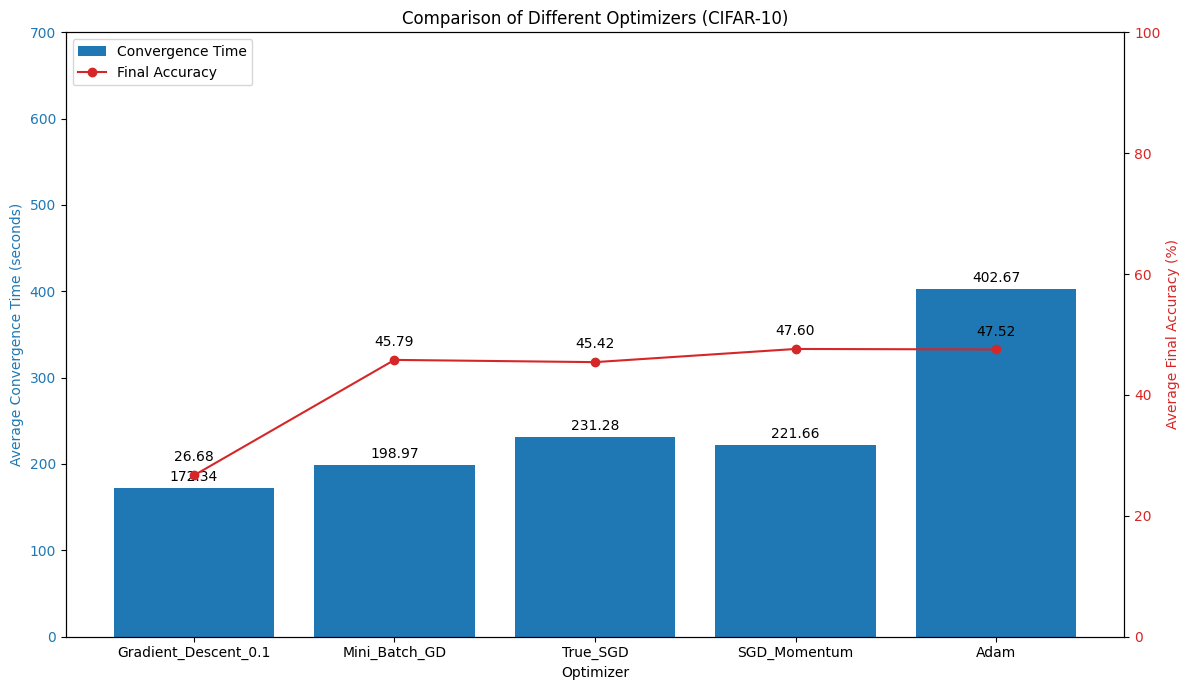

In [ ]:
import matplotlib.pyplot as plt

# Assuming MNIST_average_results is defined and contains the necessary data
optimizers = list(CIFAR10_average_results.keys())
convergence_times = [CIFAR10_average_results[opt]['Average Convergence Time'] for opt in optimizers]
final_accuracies = [CIFAR10_average_results[opt]['Average Final Accuracy'] for opt in optimizers]

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Convergence Time
color_convergence = 'tab:blue'
ax1.set_xlabel('Optimizer')
ax1.set_ylabel('Average Convergence Time (seconds)', color=color_convergence)
convergence_bar = ax1.bar(optimizers, convergence_times, color=color_convergence, label='Convergence Time')
ax1.tick_params(axis='y', labelcolor=color_convergence)

# Set x-axis and y-axis range for ax1 (Convergence Time)
ax1.set_ylim(0, 700)  # Assuming you want to set the y-axis for Convergence Time up to 500

# Add data labels for convergence time
for bar in convergence_bar:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color_accuracy = 'tab:red'
ax2.set_ylabel('Average Final Accuracy (%)', color=color_accuracy)
accuracy_line, = ax2.plot(optimizers, final_accuracies, color=color_accuracy, marker='o', label='Final Accuracy')
ax2.tick_params(axis='y', labelcolor=color_accuracy)

# Set y-axis range for ax2 (Final Accuracy)
ax2.set_ylim(0, 100)  # Set the y-axis for Final Accuracy from 0 to 100

# Add data labels for final accuracy
for i, txt in enumerate(final_accuracies):
    ax2.annotate(f'{txt:.2f}', (optimizers[i], final_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Title and layout
plt.title('Comparison of Different Optimizers (CIFAR-10)')
fig.tight_layout()

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


